In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

In [4]:
df = pd.read_csv(".\data\linear_regression_dataset.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\olato\AppData\Local\Temp\ipykernel_26272\2621062507.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(".\data\linear_regression_dataset.csv")


,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,A,Alice,371.099650
1,48.617357,64.446117,63,B,Charlie,299.184743
2,56.476885,61.820944,25,C,Bob,319.605931
3,65.230299,62.149045,56,C,Alice,348.440917
4,47.658466,41.569469,33,C,Bob,201.644393
...,...,...,...,...,...,...
200,54.967142,72.642384,62,A,Alice,371.099650
201,48.617357,64.446117,63,B,Charlie,299.184743
202,56.476885,61.820944,25,C,Bob,319.605931
203,65.230299,62.149045,56,C,Alice,348.440917


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  195 non-null    float64
 1   Feature2  197 non-null    float64
 2   Feature3  205 non-null    int64  
 3   Category  205 non-null    object 
 4   Name      205 non-null    object 
 5   Target    205 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.7+ KB


In [4]:
df.isnull().sum()

Feature1    10
Feature2     8
Feature3     0
Category     0
Name         0
Target       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(5)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# replace null values

for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

Feature1    0
Feature2    0
Feature3    0
Category    0
Name        0
Target      0
dtype: int64

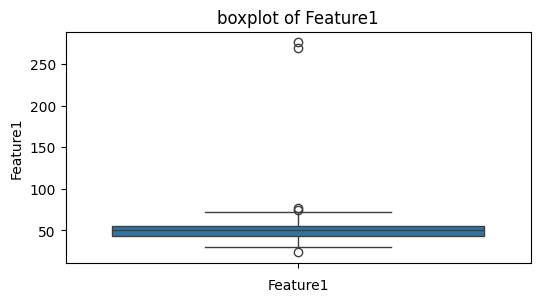

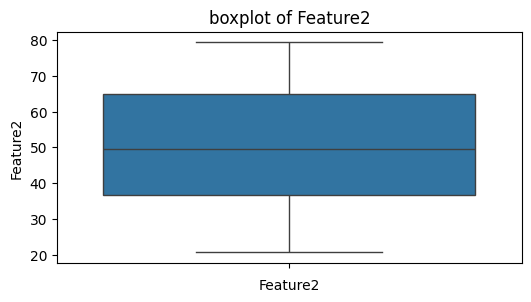

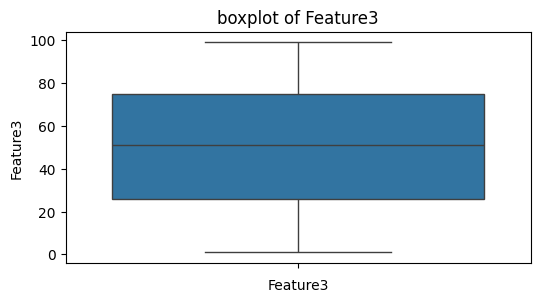

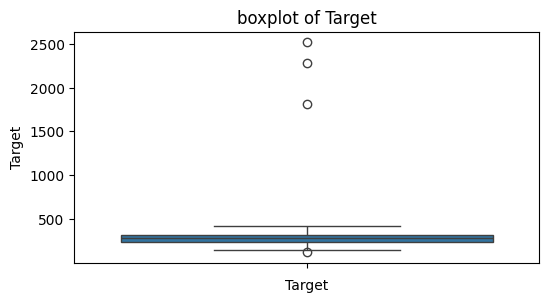

In [11]:
# check for outliers or do outliers analysis
for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    plt.figure(figsize=(6,3))
    sns.boxplot(df[col])
    plt.title(f"boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [12]:
df.shape

(200, 6)

In [13]:
# to remove outliers

for col in df.columns:
  if df[col].dtype == "int64" or df[col].dtype == "float64":
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    # remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [14]:
# after outliers are removed
df.shape

(191, 6)

In [16]:
# encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = LE.fit_transform(df[col])

In [16]:
df.head()

,Feature1,Feature2,Feature3,Category,Name,Target
0,54.967142,72.642384,62,0,0,371.099650
1,48.617357,64.446117,63,1,2,299.184743
2,56.476885,61.820944,25,2,1,319.605931
3,65.230299,62.149045,56,2,0,348.440917
4,47.658466,41.569469,33,2,1,201.644393


In [17]:
# model building

In [18]:
#  Splitting the data x,y
x = df.iloc[:, :-1]
y = df["Target"]

In [19]:
x.head()

,Feature1,Feature2,Feature3,Category,Name
0,54.967142,72.642384,62,0,0
1,48.617357,64.446117,63,1,2
2,56.476885,61.820944,25,2,1
3,65.230299,62.149045,56,2,0
4,47.658466,41.569469,33,2,1


In [20]:
y.head()

0    371.099650
1    299.184743
2    319.605931
3    348.440917
4    201.644393
Name: Target, dtype: float64

In [21]:
#  Splitting in terms of testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=0)

In [22]:
x_train.head()

,Feature1,Feature2,Feature3,Category,Name
8,45.305256,72.024339,44,0,0
118,61.428228,57.736571,51,0,3
93,46.723379,55.146535,33,2,2
94,46.078918,76.413814,98,0,1
121,40.906125,68.208856,4,1,3


In [23]:
y_train.head()

8      294.888652
118    345.862780
93     286.277283
94     360.583234
121    304.110546
Name: Target, dtype: float64

In [25]:
x_test.head()

,Feature1,Feature2,Feature3,Category,Name
114,48.076390,49.553956,85,1,3
77,47.009926,48.408306,5,0,1
170,41.104856,25.046408,51,2,2
100,35.846293,76.487889,92,0,1
129,44.965243,66.584778,39,1,0


In [26]:
y_test.head()

114    254.674838
77     244.501631
170    240.822317
100    329.400074
129    335.056209
Name: Target, dtype: float64

In [28]:
# model initialization
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
# train model
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
y_pred = model.predict(x_test)
y_pred

array([282.13651985, 257.81847089, 206.07795132, 320.21927399,
       300.68428988, 353.04547936, 220.41554383, 333.96621561,
       280.16991672, 328.30048803, 243.77718049, 205.43864967,
       249.44649741, 350.5082483 , 244.40094756, 232.932744  ,
       287.07975498, 213.60429654, 236.26104871, 325.98453625,
       303.15208402, 294.17138949, 359.54060428, 222.27501162,
       350.78491149, 301.88795082, 280.30515894, 268.7533481 ,
       277.73577679, 218.32865206, 248.86917822, 289.34054975,
       284.7704611 , 243.91438762, 268.09297554, 300.2050245 ,
       330.3938221 , 263.1061059 , 255.3004989 ])

In [31]:
# predictions
results = pd.DataFrame(columns=['Actual_values','Predicted_values'])
results['Actual_values'] = y_test
results['Predicted_values'] = y_pred
results

,Actual_values,Predicted_values
114,254.674838,282.136520
77,244.501631,257.818471
170,240.822317,206.077951
100,329.400074,320.219274
129,335.056209,300.684290
73,329.934729,353.045479
19,202.492072,220.415544
131,342.370960,333.966216
151,252.799061,280.169917
7,370.596033,328.300488


In [32]:
from sklearn.metrics import *

In [33]:
result = r2_score(y_test, y_pred)
print("R2 score: ", result*100)

R2 score:  63.663228144518655


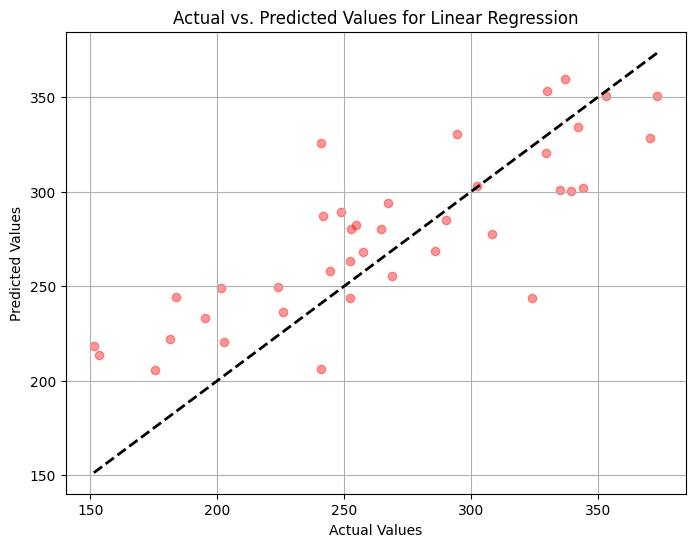

In [34]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.grid(True)
plt.show()